<a href="https://colab.research.google.com/github/VeroFrias93/TOPICO-DE-LA-INDUSTRIA-1/blob/main/PRACTICA_2_VERONICA_FRIAS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Veronica Marisela Frias Peralta
**e-mail:** veronica.frias6148@alumnos.udg.mx

## MODULES

In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

##CLASSES

In [3]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

Actividad 1: Lévy distribution - N Curves (3 pts)


*   Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen.

* Visualizar con plotly.

* Parametros m = 3.0, Levy_exponent = x, beta = 0

In [6]:
from ast import List
std_motion_steps = 3.0
Levy_exponents = [0.1, 0.5, 1.0, 1.9]
beta = 0
n_steps = 1000
Levy_pdf = list()

aux_domain = np.linspace(std_motion_steps-5, std_motion_steps+5, n_steps)
for i in range(len(Levy_exponents)):
  Levy_pdf.append(np.array([levy_stable.pdf(j, alpha=Levy_exponents[i], beta=beta, loc=std_motion_steps) for j in aux_domain]))

In [14]:
fig_Levy_pdf = go.Figure()
for m in range(len(Levy_pdf)):

  fig_Levy_pdf.add_trace(go.Scatter(x = aux_domain,
                                    y = Levy_pdf[m],
                                    marker = dict(size=2),
                                    line = dict(width=2),
                                    mode ="lines",
                                    name = "Levy_{}". format(Levy_exponents[m]),
                                    showlegend = True
                                    ))

fig_Levy_pdf.show()


In [25]:
Levy_exponent = 0.5
betas = [0, 0.25, 0.5, 0.75]
Levy_pdf2 = list()

aux_domain = np.linspace(std_motion_steps-5, std_motion_steps+5, n_steps)
for i in range(len(Levy_exponents)):
  Levy_pdf2.append(np.array([levy_stable.pdf(j, alpha=Levy_exponent, beta=betas[i], loc=std_motion_steps) for j in aux_domain]))

In [29]:
fig_Levy_pdf = go.Figure()
for m in range (len(Levy_pdf)):

  fig_Levy_pdf.add_trace(go.Scatter(x = aux_domain,
                                    y= Levy_pdf2[m],
                                    marker = dict(size=2),
                                    line = dict(width=2),
                                    mode = "lines",
                                    name = "Levy_{}". format(Levy_exponents[m]),
                                    showlegend =True
                                    ))


fig_Levy_pdf.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF.
* Visualizar con **matplotlib**.


[ 1.44530604e+00  1.03760137e+00  3.26304481e+00  3.20307544e+00
  3.61268596e+00 -1.07860323e+01  2.45198044e+00  2.77095923e+00
  8.41598026e+00  3.07802125e+00  1.74396467e+00  3.34964974e+00
  4.14346721e+00  2.45772779e+00  7.09951915e+00  4.16139003e+00
  5.05211142e+00  3.49384090e+00  3.10841499e+00  1.75935414e+00
  4.16703815e+00  2.28632556e+00  4.61139196e+00  1.44651445e+00
  2.50076917e+00  7.12095905e-01  8.46872242e+00  1.51054960e-01
  1.32560271e+00  3.12096500e+00  4.46666320e+00  3.94327208e+00
  5.98327063e+00  9.68686334e-01  2.79109263e+00  2.53162901e+00
  8.29739574e+00  4.37940028e-01  4.17693852e+00  2.26897542e+00
  8.99110972e+00  2.21730616e+00 -1.68937077e+00  4.23861194e+00
 -1.34563916e+00  2.89203773e+00  1.31765251e+00  3.25449876e+00
  3.35694643e+00  2.80459564e+00  2.34409178e+00  1.00311925e+01
  2.83316883e+00  3.16343730e+00  1.48253390e+00  6.06720236e+00
  9.68920405e+00  2.41043599e+00 -3.80596300e+01  2.60570386e+00
  2.47996560e+00  1.30494

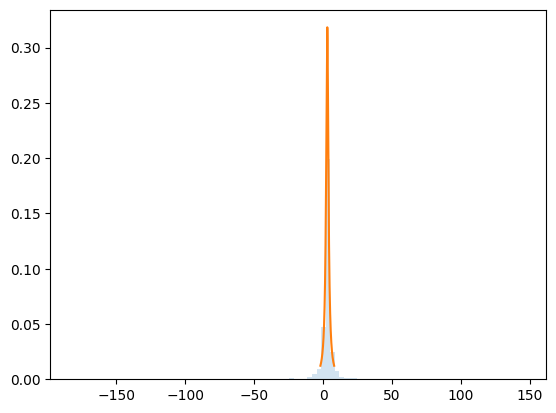

In [32]:
Levy_rvs = levy_stable.rvs(Levy_exponents[2], beta, loc=std_motion_steps, size=750)

plt.hist(Levy_rvs, bins=100, density=True, histtype="stepfilled", alpha=0.2, label="Levy walk histoi")
plt.plot(aux_domain, Levy_pdf[2])

print(Levy_rvs)

plt.show()